## Assignment

In [177]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

directory = "./data/"
df = pd.read_csv(
    directory + "morg-2014-emp.csv",
    #quotechar='"',
    #delimiter=",",
    encoding="utf-8",
    dtype = "unicode"
)
df.columns

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94'],
      dtype='object')

In [178]:
#Interesting occupations
#1005Computer and information research scientists
#1010Computer programmers
#1020Software developers, applications and systems software
#1107Computer occupations, all other
#1220Operations research analysts
#1240Mathematicians, statisticians and miscellaneous mathematical science occupations

columnsnum = ["Unnamed: 0", "hhid", "weight", "earnwke", "uhours", "grade92", "race", "ethnic", "age",	"sex", "marital", "ownchild","chldpres", "occ2012", ]
df[columnsnum] = df[columnsnum].astype(float) #Convert strings to floats (could be ints at places, but this works)
softdev = (df[(df["occ2012"])== 1020.0]).reset_index(drop=True) 

softdev['earnhour'] = (softdev['earnwke'])/(softdev['uhours']) 
softdev

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,earnhour
0,651.0,2.070044e+14,January,AZ,3410.8853,2500.00,40.0,44.0,4.0,NaN,...,0.0,"Foreign Born, US Cit By Naturalization",86,Computer systems design and related services (...,1020.0,"Private, For Profit",No,No,Employed-At Work,62.500000
1,657.0,2.360963e+14,January,AZ,3916.3279,2500.00,40.0,43.0,4.0,NaN,...,10.0,"Foreign Born, US Cit By Naturalization",86,Business support services (5614),1020.0,"Private, For Profit",No,No,Employed-At Work,62.500000
2,724.0,9.142993e+14,January,AZ,5115.4707,1250.00,45.0,43.0,1.0,NaN,...,0.0,"Native, Born In US",86,Computer systems design and related services (...,1020.0,"Private, For Profit",No,No,Employed-At Work,27.777778
3,1215.0,4.670991e+11,January,CA,2744.2335,1038.00,40.0,43.0,1.0,NaN,...,0.0,"Native, Born In US",93,Advertising and related services (5418),1020.0,"Private, For Profit",No,No,Employed-At Work,25.950000
4,1265.0,1.134076e+13,January,CA,3097.4714,2500.00,40.0,40.0,1.0,NaN,...,0.0,"Native, Born In US",93,"Architectural, engineering, and related servic...",1020.0,"Private, For Profit",No,No,Employed-At Work,62.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,315649.0,7.360838e+14,December,WA,2547.9437,2576.92,40.0,44.0,4.0,NaN,...,3.0,"Foreign Born, Not a US Citizen",9,*** Electronic shopping (New industry *454111),1020.0,"Private, For Profit",No,No,Employed-At Work,64.423000
1331,315664.0,8.350302e+14,December,WA,2490.3924,2115.38,40.0,43.0,1.0,NaN,...,3.0,"Native, Born In US",9,Services incidental to transportation (488),1020.0,"Private, For Profit",No,No,Employed-At Work,52.884500
1332,315679.0,9.120834e+14,December,WA,3199.2227,2596.15,40.0,44.0,4.0,NaN,...,3.0,"Foreign Born, Not a US Citizen",9,Computer systems design and related services (...,1020.0,"Private, For Profit",No,No,Employed-At Work,64.903750
1333,316553.0,5.562102e+13,December,WI,417.4886,1673.07,40.0,43.0,1.0,NaN,...,4.0,"Native, Born In US",3,"Navigational, measuring, electromedical, and c...",1020.0,"Private, For Profit",No,No,Employed-At Work,41.826750


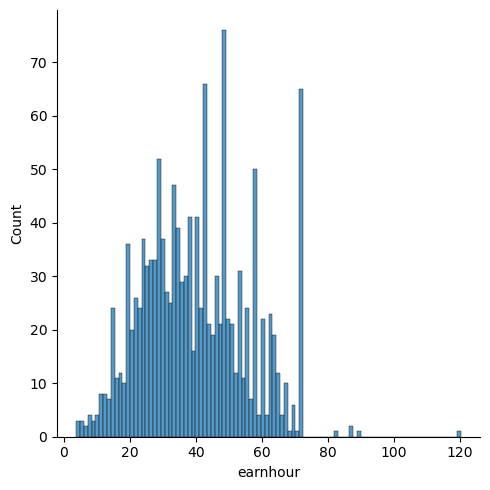

In [179]:
#Check the hourly earnings plot
sns.displot(softdev['earnhour'], bins = 100) #Seems fairly normal,but for some reason a lot of values around 72, and then none till 82
#Needs further checking, but we don't need to change the distribution (for example by taking a log)

5       72.11525
8       72.11525
41      72.11525
119     72.11525
120     72.11525
          ...   
1220    72.11525
1228    72.11525
1234    72.11525
1237    72.11525
1326    72.11525
Name: earnhour, Length: 70, dtype: float64 

        earnhour  uhours
212    81.843750    32.0
287    86.500000    20.0
428    86.538000    20.0
954   120.192083    24.0
1168   89.162963    27.0


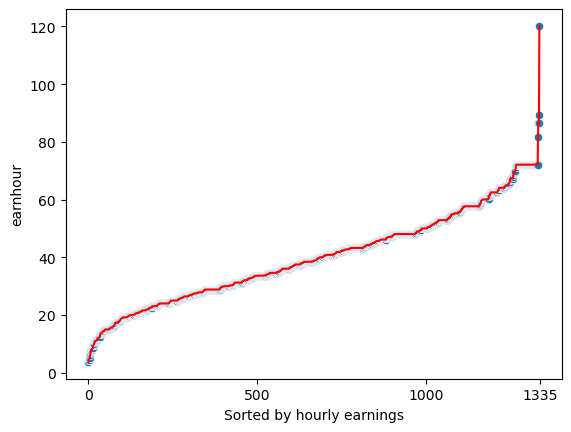

In [180]:
#Check the high values (this way of outputting a part of the dataframe works and is very useful, would recommend, much simpler than using df.loc, any DF can take a boolean dataframe input)
print(softdev[softdev['earnhour'] > 72] ['earnhour'], '\n')
print(softdev[softdev['earnhour'] > 73] [['earnhour', 'uhours']])

sorted = softdev.sort_values(by=['earnhour']).reset_index(drop=True)
sns.scatterplot( data=sorted, y="earnhour",x = sorted.index, alpha = 1)
plt.plot(sorted.index, sorted["earnhour"], color = 'red')
plt.xlabel("Sorted by hourly earnings")
plt.xticks([0,500,1000,len(sorted)]);

#### We see the value 72.11525 very often in the data, those are who work 40hrs/w and earn 2884.61/w. This seems first surprising since it is not a round number, but it means 150k/yr, so not surprising. Higher values than that: the better hourly earners actually work less hours per week. Therefore, this is an important indicator.

Some plots to see indicators importance:

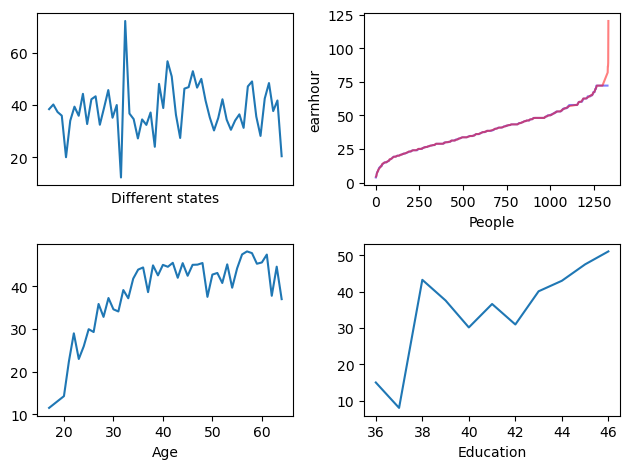

In [186]:
fig, axes = plt.subplots(2, 2)

axes[0,0].plot(sorted.groupby('state')["earnhour"].mean()) # State: Important
axes[0,0].set_xlabel('Different states')
axes[0,0].set_xticks([])

sorted_male = (sorted[sorted["sex"]==1]); sorted_female=(sorted[sorted["sex"]==2]) 
sns.lineplot( data=sorted_male, y="earnhour",x = sorted_male.index, ax=axes[0, 1], color = 'blue', alpha = 0.5)
sns.lineplot(data=sorted_female, y="earnhour",x = sorted_female.index, ax=axes[0, 1], color = 'red',alpha = 0.5)
axes[0,1].set_yticks([0,25,50,75,100,125,])  # Gender: not important
axes[0,1].set_xlabel('People')

axes[1,0].plot(sorted.groupby('age')["earnhour"].mean()) # Important
axes[1,0].set_xlabel('Age')

axes[1,1].plot(sorted.groupby('grade92')["earnhour"].mean())  # Somewhat important
axes[1,1].set_xlabel('Education')

fig.tight_layout()


## Predict: Earnings per hour based on attributes

In [187]:
y = 'earnhour'

#All models are OLS
#Model 1: Simplest


#Model 2

#Model 3

#Model 4

## Model Performance
a) RMSE
b) CV RMSE
c) BIC

In [ ]:
# RMSE

# CV RMSE

# BIC

## Results, visualizations, and discussion